Desafio 2.
Consigna
- Crear sus propios vectores con Gensim basado en lo visto en clase con otro dataset.
- Probar términos de interés y explicar similitudes en el espacio de embeddings (sacar conclusiones entre palabras similitudes y diferencias).
- Graficarlos.
- Obtener conclusiones.

1. Creando los embeddings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models.callbacks import CallbackAny2Vec

# Cargando 
df = pd.read_csv('/Users/carlosvillalobos/Documents/UBA/PNL/Desafio 2/74376.txt', sep='/n', header=None, engine='python')
print("Number of documents:", df.shape[0])

# Tokenizando las sentencias
sentence_tokens = []
for _, row in df[:None].iterrows():
    sentence_tokens.append(text_to_word_sequence(row[0]))

# Definiendo el callback para el entrenamiento
class callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss - self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

# Creando y entrenando el modelo Word2Vec
w2v_model = Word2Vec(min_count=5, window=2, vector_size=300, negative=20, workers=1, sg=1)
w2v_model.build_vocab(sentence_tokens)

print("Number of docs in the corpus:", w2v_model.corpus_count)
print("Number of unique words in the corpus:", len(w2v_model.wv.index_to_key))

w2v_model.train(sentence_tokens,
                total_examples=w2v_model.corpus_count,
                epochs=20,
                compute_loss=True,
                callbacks=[callback()])

# Guardando el modelo
w2v_model.save("book_w2v_model.model")

/Users/carlosvillalobos/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Number of documents: 3274
Number of docs in the corpus: 3274
Number of unique words in the corpus: 1014
Loss after epoch 0: 301613.875
Loss after epoch 1: 191113.875
Loss after epoch 2: 190427.3125
Loss after epoch 3: 196342.5625
Loss after epoch 4: 193237.25
Loss after epoch 5: 168431.75
Loss after epoch 6: 165742.75
Loss after epoch 7: 166014.125
Loss after epoch 8: 165948.625
Loss after epoch 9: 164121.875
Loss after epoch 10: 162960.0
Loss after epoch 11: 142594.5
Loss after epoch 12: 139044.25
Loss after epoch 13: 137267.75
Loss after epoch 14: 137295.75
Loss after epoch 15: 136664.5
Loss after epoch 16: 137283.25
Loss after epoch 17: 137123.0
Loss after epoch 18: 137798.75
Loss after epoch 19: 136882.25


2. Analizando terminos similares

In [2]:
# Palabras mas similares a "book"
print("Palabras mas similares a 'book':")
print(w2v_model.wv.most_similar(positive=["book"], topn=10))

# Palabras mas similares a "idea"
print("\nPalabras mas similares a 'idea':")
print(w2v_model.wv.most_similar(positive=["idea"], topn=10))

# Palabras mas similares a "anything"
print("\nPalabras mas similares a 'anything':")
print(w2v_model.wv.most_similar(positive=["anything"], topn=10))

Palabras mas similares a 'book':
[('represents', 0.9855372309684753), ('main', 0.9833565354347229), ('laboratory', 0.9819115400314331), ('program', 0.9815465807914734), ('atmosphere', 0.9814930558204651), ('middle', 0.9810894131660461), ('outcome', 0.9808550477027893), ('beyond', 0.9807655811309814), ('example', 0.9805458784103394), ('interested', 0.9804620742797852)]

Palabras mas similares a 'idea':
[('effect', 0.9714788794517517), ('past', 0.966976523399353), ('growing', 0.9651394486427307), ('evolution', 0.9598391056060791), ('primitive', 0.9596607685089111), ('man', 0.9596133828163147), ('insight', 0.9566723704338074), ('experience', 0.9565259218215942), ('complete', 0.956517219543457), ('supplies', 0.9561563730239868)]

Palabras mas similares a 'anything':
[('why', 0.9868370294570923), ('mean', 0.9857428073883057), ('understand', 0.978318452835083), ('indicate', 0.9766327738761902), ('hope', 0.9762974381446838), ('suppose', 0.9732613563537598), ('know', 0.971022367477417), ('told

3. Visualizando los embeddings

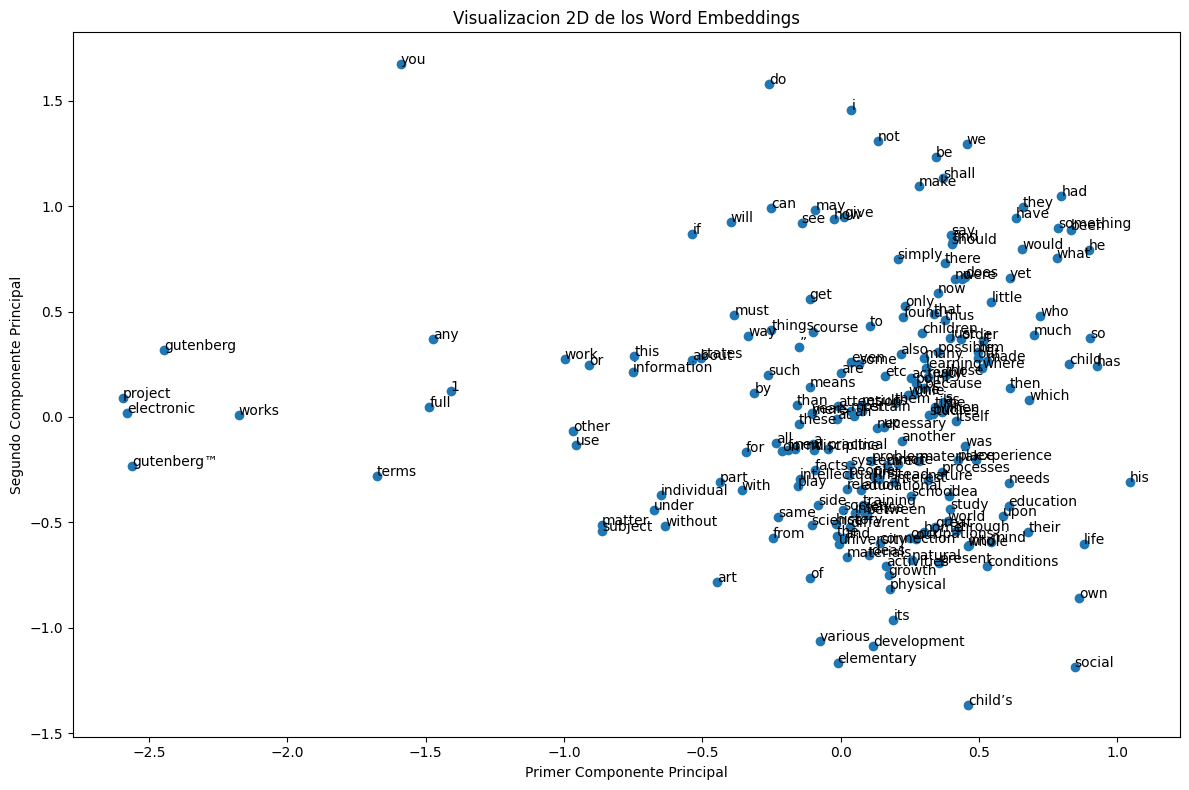

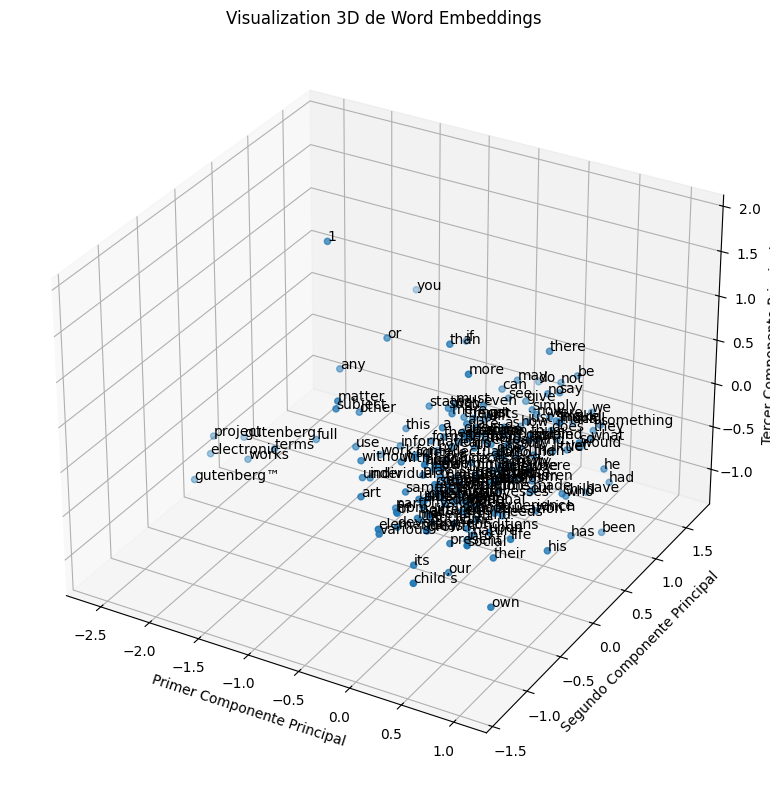

In [3]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def reduce_dimensions(model, num_dimensions=2):
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)
    pca = PCA(n_components=num_dimensions)
    vectors = pca.fit_transform(vectors)
    return vectors, labels

def plot_2d_embeddings(model, max_words=200):
    vecs, labels = reduce_dimensions(model, 2)
    plt.figure(figsize=(12, 8))
    plt.scatter(vecs[:max_words, 0], vecs[:max_words, 1], marker='o')
    for i, word in enumerate(labels[:max_words]):
        plt.annotate(word, xy=(vecs[i, 0], vecs[i, 1]))
    plt.title("Visualizacion 2D de los Word Embeddings")
    plt.xlabel("Primer Componente Principal")
    plt.ylabel("Segundo Componente Principal")
    plt.tight_layout()
    plt.show()

def plot_3d_embeddings(model, max_words=200):
    vecs, labels = reduce_dimensions(model, 3)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(vecs[:max_words, 0], vecs[:max_words, 1], vecs[:max_words, 2], marker='o')
    for i, word in enumerate(labels[:max_words]):
        ax.text(vecs[i, 0], vecs[i, 1], vecs[i, 2], word)
    ax.set_title("Visualization 3D de Word Embeddings")
    ax.set_xlabel("Primer Componente Principal")
    ax.set_ylabel("Segundo Componente Principal")
    ax.set_zlabel("Tercer Componente Principal")
    plt.tight_layout()
    plt.show()

# Uso:
# Suponiendo que w2v_model es tu modelo Word2Vec entrenado
plot_2d_embeddings(w2v_model)
plot_3d_embeddings(w2v_model)

# Opcional: Guardar vectores y etiquetas como TSV para TensorFlow Projector
vectors = np.asarray(w2v_model.wv.vectors)
labels = list(w2v_model.wv.index_to_key)
np.savetxt("vectors.tsv", vectors, delimiter="\t")
with open("labels.tsv", "w") as fp:
    for item in labels:
        fp.write("%s\n" % item)

Conclusiones:
- El modelo ha capturado relaciones semanticas entre palabras, lo cual se puede observar en las similitudes entre "book", "idea" y "anything". Esto muestra la existencia de contexto.
- Las relaciones entre estas palabras nos dan una idea del contexto del documento completo.
- Los clusters de palabras tambien nos dan una idea de la estructura del documento.
- Los embeddings muestran el estilo de escribir del autor.
- Palabras localizadas en lugares inesperados nos muestra que se usan en contextos diferentes.
- La cantidad de palabras nos muestra el extenso vocabulario usado por el autor.